In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')
%matplotlib inline

import statistics
from statistics import mode


import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist # used later to plot and get count
from nltk.tokenize import word_tokenize # tokenizes our sentence by word

In [ ]:
cleaned_no_slurs_path = "../input/no-slurs-lyrics/slurs_annotated_data.csv"
cleaned_slurs_path = "../input/cleaned-cr/cleaned_verses_only (1).csv"
slurs_path = "../input/slurs-data/slurs.csv"

  # **EXPLANATORY DATA ANALYSIS**

# Slurs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12, 6)})
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [ ]:
slurs_df = pd.read_csv(slurs_path, sep=";")

In [ ]:
slurs_df.sample(3)

,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
401,paki,paki,NaN,NaN,racial / ethnic slurs,NaN,NaN,2.6,Severe
827,fcuker,fuck,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,2.4,Strong
356,crows,crow,NaN,NaN,sexual orientation / gender,animal references,NaN,1.4,Mild


## severity descriptions over corpus

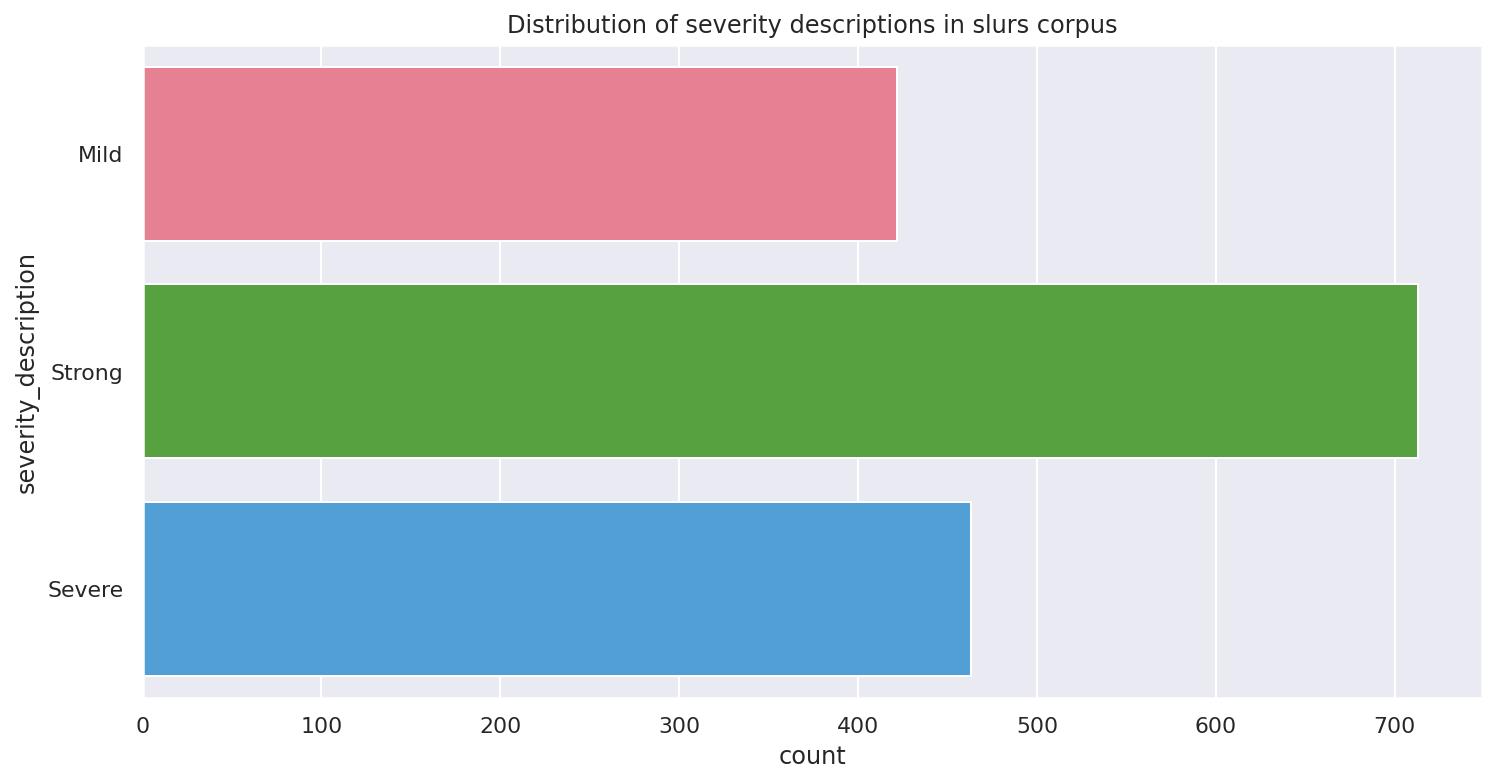

In [ ]:
plot1 = sns.countplot(y="severity_description", data=slurs_df, palette="husl")
plt.title('Distribution of severity descriptions in slurs corpus')
plt.savefig('sev_descr_slurs.png')

As we can see, the dominant number of strong slurs belongs to **sexual anatomy / sexual acts** category. At the same time the most severe slurs are in the **racial / ethnic slurs** category.

In [ ]:
slurs_df

,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
0,69,69,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
1,@55,ass,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild
2,rat baztad,bastard,NaN,NaN,animal references,NaN,NaN,1.8,Strong
3,ape shit,ape,shit,NaN,bodily fluids / excrement,NaN,NaN,1.6,Strong
4,ape shite,ape,shit,NaN,bodily fluids / excrement,animal references,NaN,1.6,Strong
...,...,...,...,...,...,...,...,...,...
1593,wnker,wank,NaN,NaN,sexual anatomy / sexual acts,other / general insult,NaN,1.0,Mild
1594,whor3,whore,NaN,NaN,sexual orientation / gender,NaN,NaN,1.8,Strong
1595,whore,whore,NaN,NaN,sexual orientation / gender,NaN,NaN,1.8,Strong
1596,zip in the wire,zipperhead,NaN,NaN,racial / ethnic slurs,NaN,NaN,1.4,Mild


In [ ]:
slurs_df["category_1"] = slurs_df["category_1"].apply(lambda x: x.split(" /"))

In [ ]:
slurs_df["category_1"] = slurs_df["category_1"].apply(lambda x: "\n".join(el for el in x))

In [ ]:
slurs_df["category_1"] 

0       sexual anatomy\n sexual acts
1       sexual anatomy\n sexual acts
2                  animal references
3          bodily fluids\n excrement
4          bodily fluids\n excrement
                    ...             
1593    sexual anatomy\n sexual acts
1594     sexual orientation\n gender
1595     sexual orientation\n gender
1596           racial\n ethnic slurs
1597     sexual orientation\n gender
Name: category_1, Length: 1598, dtype: object

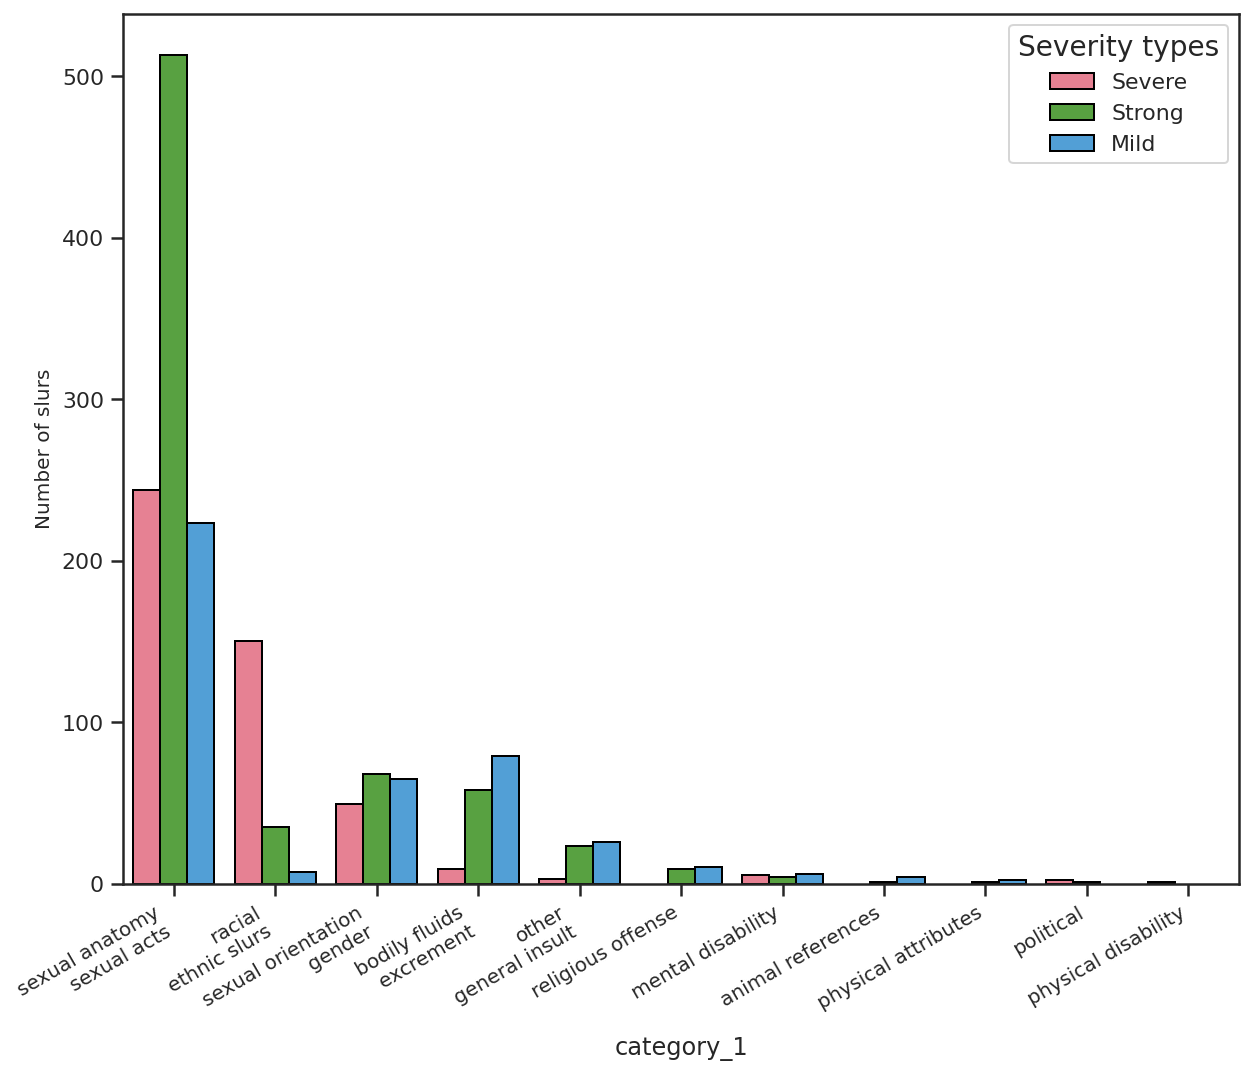

In [ ]:
plt.figure(figsize=(10,8)) 
sns.set_style("ticks")
ax = sns.countplot(data=slurs_df, order=slurs_df.category_1.value_counts().index, 
              x="category_1", hue='severity_description', hue_order= ["Severe",'Strong',"Mild"], 
              lw=1, ec="black", palette="husl")
#ax.set_title('Severity Description per category in slurs lexicon',fontsize = 18, fontweight='bold' )
ax.set_ylabel('Number of slurs', fontsize = 10)
#ax.set_xlabel('Categories of slurs', fontsize = 8)
ax.legend(fontsize = 12, bbox_to_anchor=(.30, .95),
               title="Severity types", 
               title_fontsize = 14);
sns.move_legend(ax, "upper right")

ax.set_xticklabels(ax.get_xticklabels(), size= 10, rotation=30, horizontalalignment='right')
plt.savefig('sev_descr_per_category_slurs.png')
fig = ax.get_figure()
fig.savefig('countplot.png')


In [ ]:
slurs_df[slurs_df["severity_description"] == "Severe"]["severity_rating"].min()

2.6

Since the number of slurs belonging to the **sexual anatomy** category prevails in the corpus, the distribution shows that the most severe slers also belong to this category as having the highest severity ratings

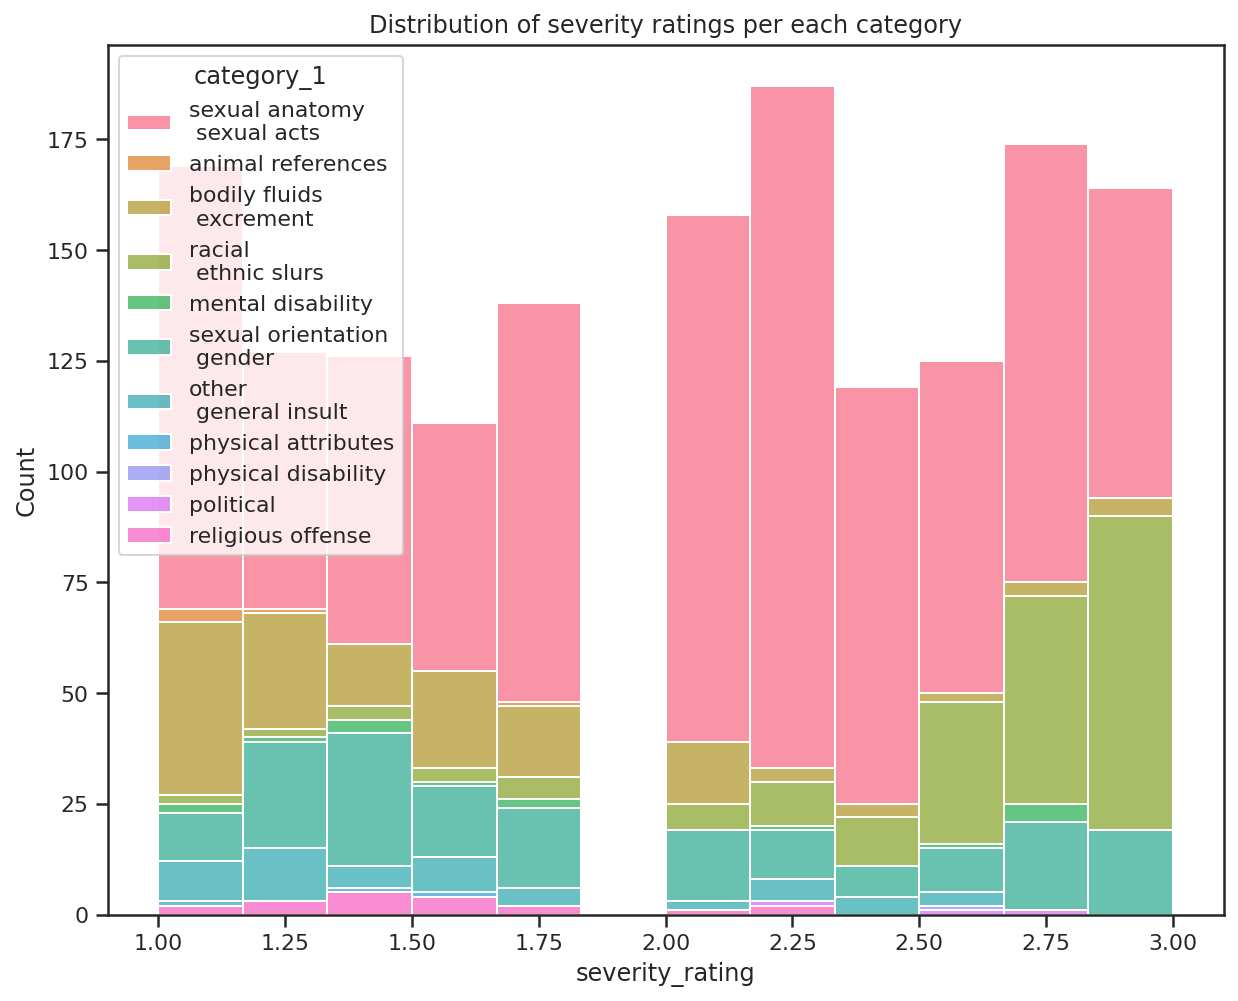

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,8)) 
sns.histplot(data=slurs_df, x="severity_rating", hue="category_1", multiple="stack")
plt.title('Distribution of severity ratings per each category')
plt.show()
plt.savefig('sev_rating_cat_slurs.png')

In [ ]:
mean_sev_rating_per_cat = slurs_df.groupby(["category_1", "severity_description"])["severity_rating"].agg("mean")

In [ ]:
mean_sev_rating_per_cat

category_1                    severity_description
animal references             Mild                    1.050000
                              Strong                  1.800000
bodily fluids\n excrement     Mild                    1.136709
                              Severe                  2.844444
                              Strong                  1.824138
mental disability             Mild                    1.233333
                              Severe                  2.760000
                              Strong                  1.850000
other\n general insult        Mild                    1.169231
                              Severe                  2.600000
                              Strong                  1.939130
physical attributes           Mild                    1.200000
                              Strong                  1.600000
physical disability           Severe                  2.600000
political                     Severe                  2.700000
    

# Raw corpus (with slurs)

In [ ]:
raw = pd.read_csv(cleaned_slurs_path, sep="~", error_bad_lines=False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
raw = raw.drop(["Unnamed: 0"], axis=1)
raw

,rapper,song,year,lyrics
0,Cordae,RNP,2019.0,One of y'all niggas gon' be fuckin' with me|I ...
1,Cordae,Kung Fu,2018.0,Day-Day-Daytrip took it to 10|Let me tell you ...
2,Cordae,Bad Idea,2019.0,Ooh|Ooh|Yeah uh|Bongo ByTheWay|I know myself a...
3,Cordae,Have Mercy,2019.0,Kid|Ugh|Sweet Lord please have mercy|Baby Jesu...
4,Cordae,Old Niggas,2018.0,Damn Mizzy Mauri got beats|Uh old niggas and n...
...,...,...,...,...
16031,André 3000,Chronomentrophobia (Movie Version),2006.0,Chronomentrophobia the fear of clocks|The fear...
16032,André 3000,We Want Your Soul,2007.0,So I hear you like to be a star|Well the price...
16033,André 3000,Class Of 3000 Theme,2007.0,Good morning little people!|Good morning Sunny...
16034,André 3000,Hey Ya! - Single Version,2003.0,1 2 3 uh!|My baby don't mess around|Because sh...


In [ ]:
lyr = raw["lyrics"][0].replace("|", "\n")
print(lyr)

One of y'all niggas gon' be fuckin' with me
I got two bad bitches gon' be rubbin' my feet
I got three young niggas down to bust out the heat
And all y'all ain't got nothin' on me
Ooh not one of y'all niggas gon' be fuckin' with me
I got two bad bitches gon' be rubbin' my feet
I got three young niggas down to bust out the heat
And all y'all ain't got nothin' on me
Uh okay put your fucking hands up this the fucking anthem
Smiling 'cause I'm young rich black and I'm handsome
Not to mention wealthy ass on her healthy
Young millionaire what the fuck can you tell me? Smell me?
Nigga that's Chanel cologne
I'm in Europe with the tourists with no cellular phone
Like ooh sound like rich nigga problems
I hit a bad bitch with a fistful of condoms
And the randomness of risky ménages
Like get the head right she can get what she wanted
The spits then flaunt it my drip like a faucet
She told me she was prego I ain't even take the motherfuckin' dick out my pocket yeah

The opposite
She want me to fly h

In [ ]:
raw["tokens"] = raw["lyrics"].apply(lambda x: str(x).replace("|", "\n"))
raw["tokens_p"] = raw["tokens"].apply(lambda x: word_tokenize(x))

In [ ]:
raw.head(3)

,rapper,song,year,lyrics,tokens,tokens_p
0,Cordae,RNP,2019.0,One of y'all niggas gon' be fuckin' with me|I ...,One of y'all niggas gon' be fuckin' with me\nI...,"[One, of, y'all, niggas, gon, ', be, fuckin, '..."
1,Cordae,Kung Fu,2018.0,Day-Day-Daytrip took it to 10|Let me tell you ...,Day-Day-Daytrip took it to 10\nLet me tell you...,"[Day-Day-Daytrip, took, it, to, 10, Let, me, t..."
2,Cordae,Bad Idea,2019.0,Ooh|Ooh|Yeah uh|Bongo ByTheWay|I know myself a...,Ooh\nOoh\nYeah uh\nBongo ByTheWay\nI know myse...,"[Ooh, Ooh, Yeah, uh, Bongo, ByTheWay, I, know,..."


In [ ]:
raw.rapper.value_counts()

Snoop Dogg         613
The Game           586
K.A.A.N.           471
Eminem             469
2Pac               459
                  ... 
Black Thought       51
Eric B. & Rakim     46
​The D.O.C.         40
Runblebee           14
André 3000           7
Name: rapper, Length: 89, dtype: int64

In [ ]:
raw["len_of_lyrics"] = raw["tokens_p"].apply(lambda x: len(x))

### Find the mean length of lyrics for each rapper

In [ ]:
mean_length_rapper = raw.groupby(["rapper"])["len_of_lyrics"].agg("mean")

In [ ]:
average_length_lyrics = mean_length_rapper.to_frame().reset_index()

In [ ]:
average_length_lyrics.to_excel("table_aver_length_slurs.xlsx")
average_length_lyrics

,rapper,len_of_lyrics
0,2Pac,761.732026
1,50 Cent,585.730871
2,A Tribe Called Quest,637.407143
3,A$AP Rocky,511.154412
4,Ace Hood,540.082278
...,...,...
84,Wu-Tang Clan,638.672840
85,XXXTENTACION,256.398496
86,Xzibit,632.442748
87,Yasiin Bey,525.039216


## Mean length for the first 15 rappers in dataset

<AxesSubplot:xlabel='rapper', ylabel='len_of_lyrics'>

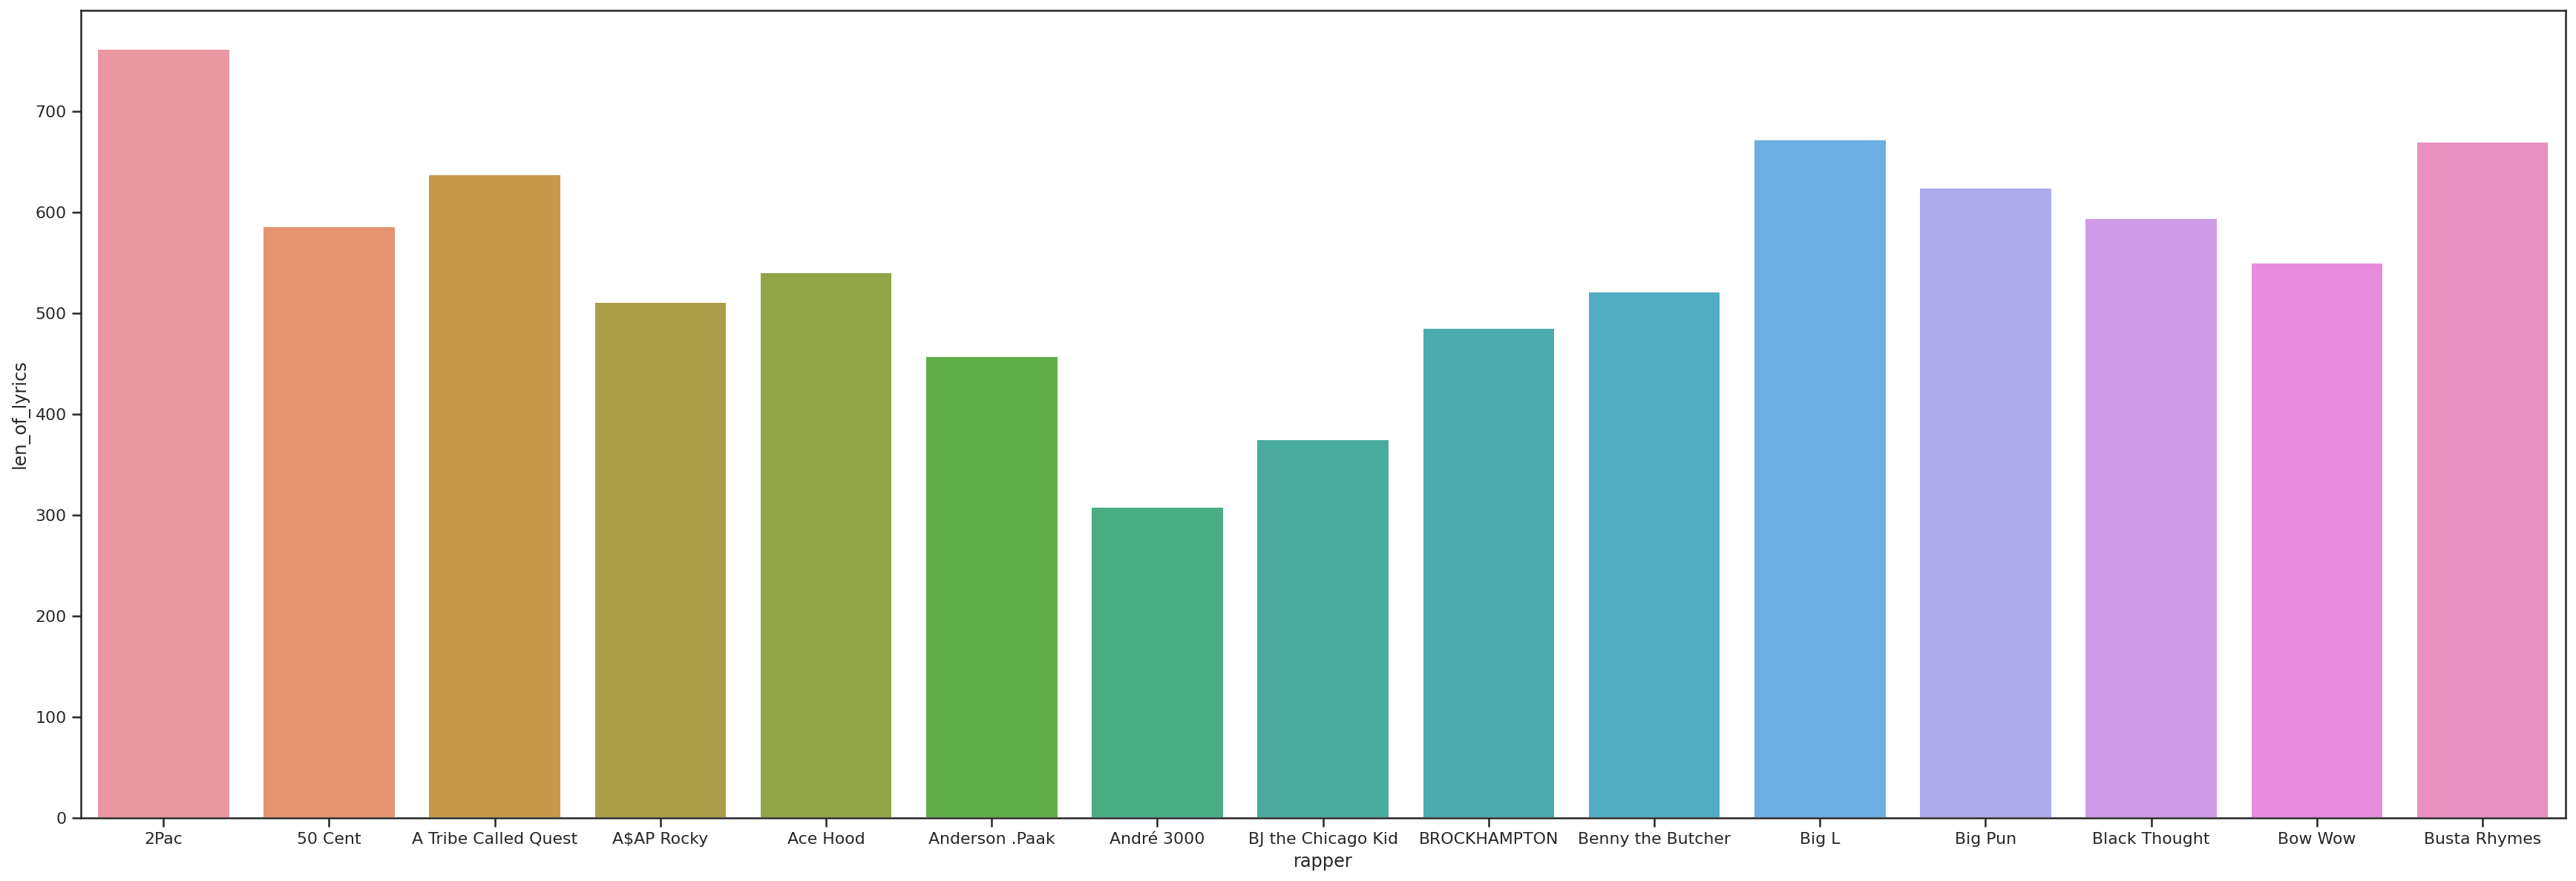

In [ ]:
plt.figure(figsize=(30,10)) 

sns.barplot(x='rapper', y='len_of_lyrics', data=average_length_lyrics[:15])

In [ ]:
mean_leng = raw["len_of_lyrics"].mean()
mean_leng

600.3687952107757

### corpus size

In [ ]:
raw["len_of_lyrics"].sum()

9627514

In [ ]:
import gensim
import gensim.corpora as corpora

In [ ]:
from gensim.models import CoherenceModel
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# spacy for lemmatization
import spacy

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(lyrics):
    lyrics = lyrics.replace("\n", " ")
    tokens = lyrics.split()
    tokens = [token for token in tokens if token.isalpha() == True]
    tokens = [token for token in tokens if token not in stop_words]
    lemmas = [lemmatizer.lemmatize(w) for w in tokens]
    lemmas = [lemma.lower() for lemma in lemmas if len(lemma) > 3]
    return lemmas
    

In [ ]:
raw["lemmas"] = raw["lyrics"].apply(lambda x: preprocess(x))

In [ ]:
all_data = raw["lemmas"].to_list()
lst = []
for el in all_data:
    lst += el
sent = " ".join(w for w in lst)

## Most common words in dataset with slurs

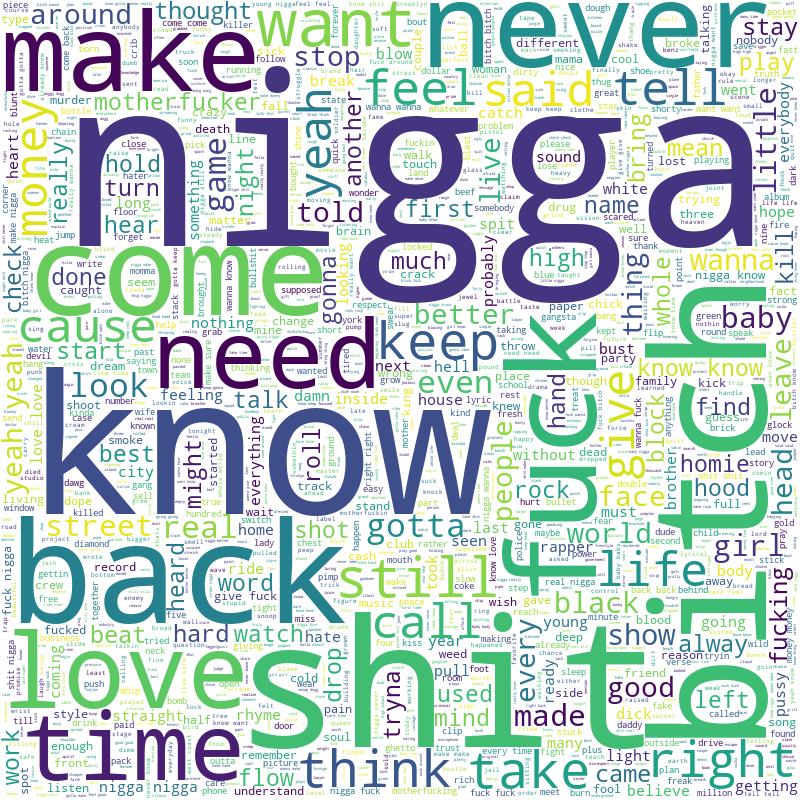

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = sent
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, background_color="white", max_words=5000, contour_width=10, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

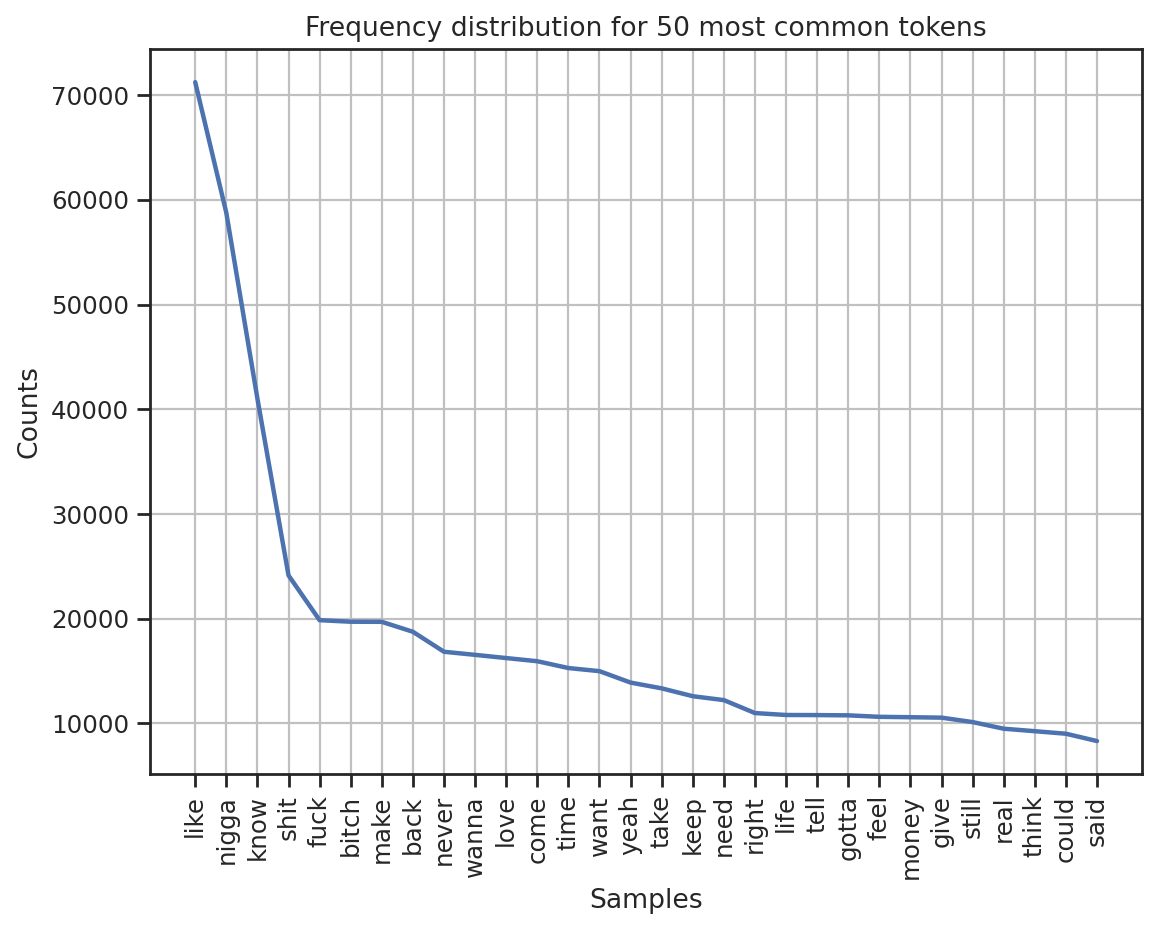

<AxesSubplot:title={'center':'Frequency distribution for 50 most common tokens'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
import collections
from collections import Counter

most_popular = collections.Counter(lst)
m_p = most_popular.most_common()
all_p = [el[0] for el in m_p]

df_counts = pd.DataFrame(m_p, columns=["word", "freq"])

fdist = FreqDist(lst) 

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

fdist.plot(30,title='Frequency distribution for 50 most common tokens')


### Implement slurs-matching function to look at the slurs presented in raw corpus

#### here we use the code for categories matching provided on [GitHub](https://github.com/ManilBen/Raply/blob/main/key_words_match.ipynb)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df = pd.read_csv(cleaned_slurs_path, sep="~").drop(["Unnamed: 0"], axis=1)

In [ ]:
df.head(3)

,rapper,song,year,lyrics
0,Cordae,RNP,2019.0,One of y'all niggas gon' be fuckin' with me|I ...
1,Cordae,Kung Fu,2018.0,Day-Day-Daytrip took it to 10|Let me tell you ...
2,Cordae,Bad Idea,2019.0,Ooh|Ooh|Yeah uh|Bongo ByTheWay|I know myself a...


In [ ]:
df["lyrics"] = raw["lyrics"].apply(lambda text: str(text).replace('|', ' \n'))
df["lyrics_splitted"] = df["lyrics"].apply(lambda text: str(text).replace('\n', ' '))
df["lyrics_splitted_lines"] = df["lyrics"].apply(lambda text: str(text).splitlines())
df['lyrics_tokenized'] = df["lyrics_splitted"].apply(lambda text: ' '.join(word_tokenize(text)))
lemmatizer = WordNetLemmatizer()
df["lyrics_lemmatized"] = df["lyrics_tokenized"].apply(lambda text: [lemmatizer.lemmatize(word) for word in text.split(' ')])
df["formula_num_sent"] = df["lyrics_splitted_lines"].apply(lambda text: len(text))
slurs = dict(zip(slurs_df.text, slurs_df.severity_rating))

In [ ]:
def get_matched_words(df, slurs: dict) -> list:
    df["slurs"] = np.nan
    df["num_slurs"] = np.nan
    df["formula_song"] = np.nan
    for ind, (_, row) in tqdm(enumerate(df.iterrows())):
        match_words = []
        new_set = set(row["lyrics_lemmatized"])
        for word in new_set:
            if word in slurs:
                match_words.append(word)
        row["slurs"] = match_words
        row["num_slurs"] = len(row["slurs"])
        
        formula_song = 0.0
        for word in match_words:
            formula_song += float(slurs[word])
        row["formula_song"] = formula_song / len(row["lyrics_tokenized"])
        
        df.at[ind] = row


        
def get_matched_categories(df, category: dict) -> list:
    df["category"] = np.nan
    for ind, (_, row) in tqdm(enumerate(df.iterrows())):
        match_words = []
        new_set = set(row["slurs"])
        for word in new_set:
            if word in category:
                match_words.append(category[word])
        row["category"] = match_words
        df.at[ind] = row
        
        
        
get_matched_words(df, slurs)

category_map = []
category = dict(category_map)
for ind, (_, row) in tqdm(enumerate(slurs_df.iterrows())):
    key = row["text"]
    value = row["category_1"]
    if key not in category:
        category[key] = value
        
get_matched_categories(df, category)

16036it [01:47, 148.60it/s]
1598it [00:00, 20192.02it/s]
16036it [01:54, 139.73it/s]


In [ ]:
def get_matched_categories(df, category: dict) -> list:
    df["category"] = np.nan
    for ind, (_, row) in tqdm(enumerate(df.iterrows())):
        match_words = []
        new_set = set(row["slurs"])
        for word in new_set:
            if word in category:
                match_words.append(category[word])
        row["category"] = match_words
        df.at[ind] = row
        
get_matched_categories(df, category)


merge_category = { 
     'racial / ethnic slurs': 'racial / ethnic / religious offense',
     'religious offense': 'racial / ethnic / religious offense',
     'other / general insult': 'mental disability/ general insults',
     'mental disability': 'mental disability/ general insults', 
     'animal references': 'delete',
     'physical attributes': 'delete',
     'physical disability': 'delete',
     'political': 'delete'
}



slurs_df["merged_category"] = np.nan
for ind, (_, row) in tqdm(enumerate(slurs_df.iterrows())):
    category = row["category_1"]
    if category not in merge_category:
        row["merged_category"] = category
    else:
        mapped = merge_category[category]
        if mapped != "delete":
            row["merged_category"] = mapped
    slurs_df.at[ind] = row

16036it [01:54, 140.14it/s]
1598it [00:03, 399.53it/s]


In [ ]:
# df["merged_category"] = np.nan
        
# for ind, (_, row) in tqdm(enumerate(df.iterrows())):
#     row["merged_category"] = []
#     for category in row["category"]:
#         if category not in merge_category:
#             row["merged_category"].append(category)
#         else:
#             mapped = merge_category[category]
#             if mapped != "delete":
#                 row["merged_category"].append(mapped)
#     df.at[ind] = row

In [ ]:
df.head(2)

,rapper,song,year,lyrics,lyrics_splitted,lyrics_splitted_lines,lyrics_tokenized,lyrics_lemmatized,formula_num_sent,slurs,num_slurs,formula_song,category
0,Cordae,RNP,2019.0,One of y'all niggas gon' be fuckin' with me \n...,One of y'all niggas gon' be fuckin' with me I...,"[One of y'all niggas gon' be fuckin' with me ,...",One of y'all niggas gon ' be fuckin ' with me ...,"[One, of, y'all, nigga, gon, ', be, fuckin, ',...",57,"[nigga, bitch, motherfuckin, fucking, Fuck, fu...",6.0,0.004926,"[sexual anatomy\n sexual acts, racial\n ethnic..."
1,Cordae,Kung Fu,2018.0,Day-Day-Daytrip took it to 10 \nLet me tell yo...,Day-Day-Daytrip took it to 10 Let me tell you...,"[Day-Day-Daytrip took it to 10 , Let me tell y...",Day-Day-Daytrip took it to 10 Let me tell you ...,"[Day-Day-Daytrip, took, it, to, 10, Let, me, t...",88,"[goddamn, nigga, bitch, fucked, fucking, shit]",6.0,0.003260,"[religious offense, racial\n ethnic slurs, sex..."


In [ ]:
df.to_csv("some_results.csv")

In [ ]:
#df["popular_category"] = np.nan
#for ind, (_, row) in tqdm(enumerate(df.iterrows())):
 #   if len(row["merged_category"]) > 0:
  #      row["popular_category"] = mode(row["merged_category"])
  #  df.at[ind] = row

In [ ]:
out = pd.read_csv("/kaggle/input/out-slurs/out.csv").drop(["Unnamed: 0"], axis=1)

In [ ]:
out.head(3)

,rapper,song,year,lyrics,lyrics_splitted,lyrics_splitted_lines,lyrics_tokenized,lyrics_lemmatized,formula_num_sent,slurs,num_slurs,formula_song,category,merged_category,popular_category
0,Cordae,RNP,2019.0,"Uh, okay, put your fucking hands up, this the ...","Uh, okay, put your fucking hands up, this the ...","['Uh, okay, put your fucking hands up, this th...","Uh , okay , put your fucking hands up , this t...","['Uh', ',', 'okay', ',', 'put', 'your', 'fucki...",30,"['motherfuckin', 'fucking', 'Fuck', 'nigga', '...",5.0,0.006905,"['sexual anatomy / sexual acts', 'sexual anato...","['sexual anatomy / sexual acts', 'sexual anato...",sexual anatomy / sexual acts
1,Cordae,Kung Fu,2018.0,I'ma just get it and get it again\nCome ups I ...,I'ma just get it and get it again Come ups I s...,"[""I'ma just get it and get it again"", 'Come up...",I'ma just get it and get it again Come ups I s...,"[""I'ma"", 'just', 'get', 'it', 'and', 'get', 'i...",37,"['fucked', 'goddamn', 'fucking', 'nigga', 'bit...",5.0,0.005893,"['sexual anatomy / sexual acts', 'sexual anato...","['sexual anatomy / sexual acts', 'sexual anato...",sexual anatomy / sexual acts
2,Cordae,Bad Idea,2019.0,I know myself all too well to be a stranger of...,I know myself all too well to be a stranger of...,['I know myself all too well to be a stranger ...,I know myself all too well to be a stranger of...,"['I', 'know', 'myself', 'all', 'too', 'well', ...",44,"['nigga', 'shit']",2.0,0.001683,"['bodily fluids / excrement', 'racial / ethnic...","['bodily fluids / excrement', 'racial / ethnic...",bodily fluids / excrement


### Most spread rapper

In [ ]:
out.rapper.value_counts(ascending=False)

Juice WRLD         1063
The Game            576
2Pac                562
Snoop Dogg          462
K.A.A.N.            446
                   ... 
Eric B. & Rakim      41
Warren G             40
​The D.O.C.          30
Runblebee            11
André 3000            6
Name: rapper, Length: 89, dtype: int64

In [ ]:
out.category = out.category.apply(lambda x: x.replace("'",""))
out.category = out.category.apply(lambda x: x.replace("]",""))
out.category = out.category.apply(lambda x: x.replace("[",""))
out.category = out.category.apply(lambda x: x.split(","))

In [ ]:
out.category = out.category.apply(lambda x: [s.strip() for s in x])
out.category[0]

['sexual anatomy / sexual acts',
 'sexual anatomy / sexual acts',
 'sexual anatomy / sexual acts',
 'sexual orientation / gender',
 'racial / ethnic slurs']

In [ ]:
#out.category = out.category.apply(lambda x: [st.replace(" ", "") for st in x])

In [ ]:
all_slurs = []
for line in out.category:
    all_slurs += line
    

In [ ]:
len(all_slurs)

52355

In [ ]:
all_slurs[:10]

['sexual anatomy / sexual acts',
 'sexual anatomy / sexual acts',
 'sexual anatomy / sexual acts',
 'sexual orientation / gender',
 'racial / ethnic slurs',
 'sexual anatomy / sexual acts',
 'sexual anatomy / sexual acts',
 'sexual orientation / gender',
 'religious offense',
 'racial / ethnic slurs']

In [ ]:
out.category = out.category.apply(lambda x: x if len(x) >= 1 else "no slurs")

In [ ]:
#distr = pd.read_csv("/kaggle/input/distr-df/distr.csv", sep=";")
distr = pd.read_csv("/content/distr.csv", sep=";")

In [ ]:
distr = distr[distr["category"] != "no slurs song"]

In [ ]:
distr

,category,number of slurs
0,sexual anatomy\nsexual acts,18137
1,sexual orientation\ngender,10704
2,bodily fluids\nexcrement,10074
3,racial\nethnic slurs,9900
4,no slurs song,2225
5,other\ngeneral insult,859
6,religious offense,291
7,animal references,119
8,mental disability,46


In [ ]:
distr["category"] = distr["category"].apply(lambda x: x.split("/"))
distr["category"] = distr["category"].apply(lambda x: "\n".join(el for el in x))

In [ ]:
import collections
num_cats = collections.Counter(all_slurs)
num_cats_df = pd.DataFrame.from_dict(num_cats, orient='index').reset_index()

In [ ]:
distr["number of slurs"].sum()

50130

### Distribution of slurs in lyrics slur corpus per each category

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
distr["number of slurs"] = distr["number of slurs"].apply(lambda x: int(x))

<ipython-input-9-c3a7396dbd6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distr["number of slurs"] = distr["number of slurs"].apply(lambda x: int(x))


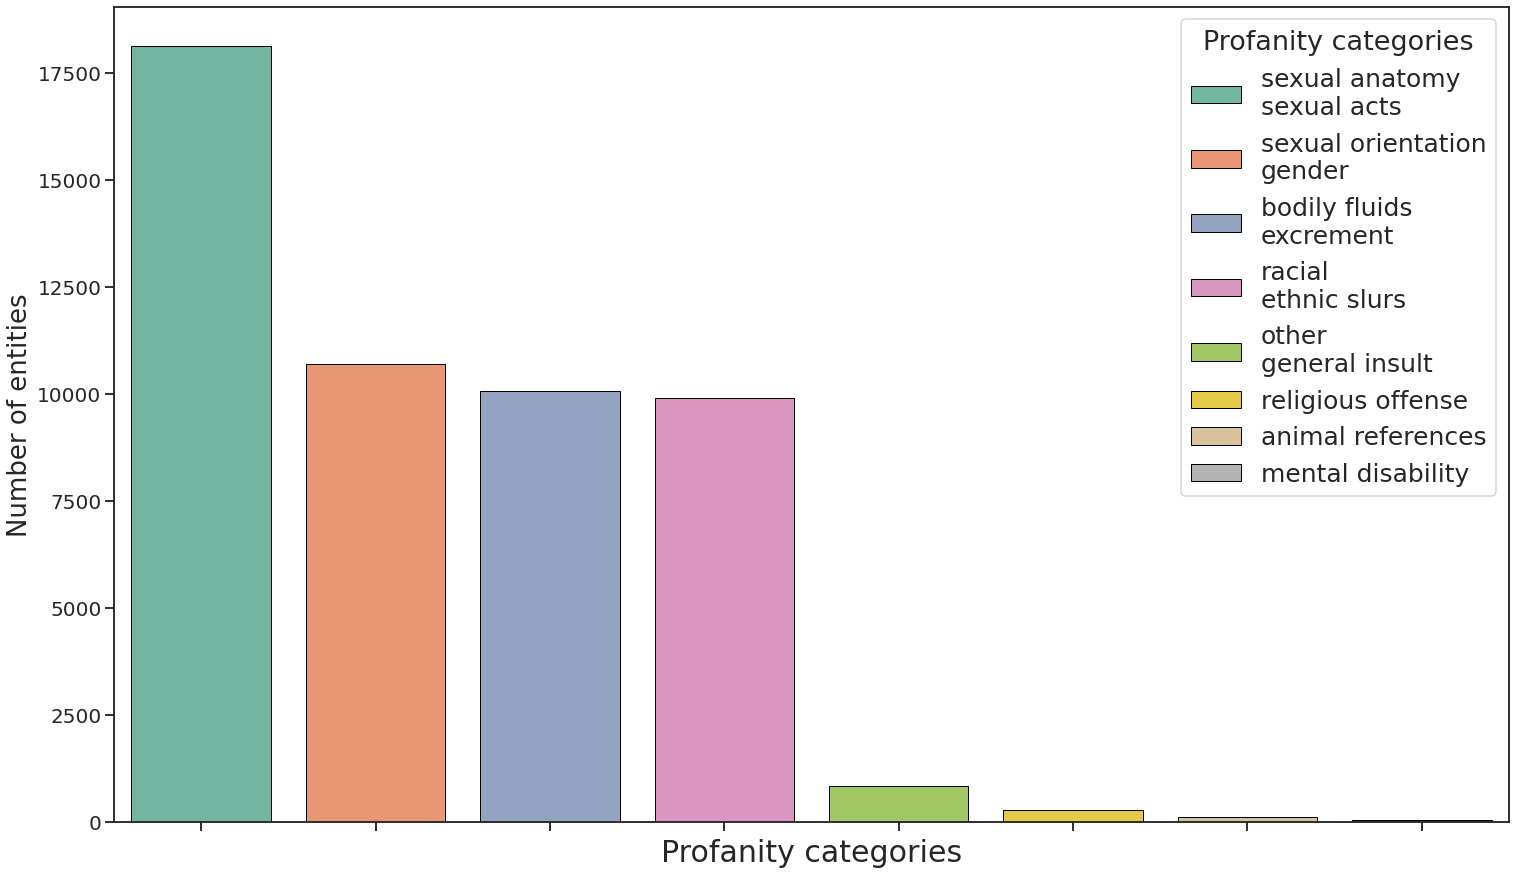

In [ ]:
plt.figure(figsize=(25,15)) 
sns.color_palette("Set2")
axe = sns.barplot(x ='category', y ='number of slurs', data = distr,
            lw=1, ec="black", hue = "category", palette="Set2", dodge=False)


axe.set_ylabel('Number of entities', fontsize = 26)
axe.set_xlabel('Profanity categories', fontsize = 30)
sns.set_style("ticks")

#axe.set_xticklabels(ax.get_xticklabels(), size= 10, rotation=30, horizontalalignment='right')
#axe.set_yticklabels(axe.get_yticks(), size = 15)
axe.set(xticklabels=[])  
axe.set_yticks([0,2500, 5000, 7500, 10000, 12500, 15000, 17500])
plt.yticks(fontsize=20)
#ax.set_xtickslabels(['Label1', 'Label2', 'Label3'])
axe.legend(fontsize = 50, bbox_to_anchor=(.9, .9))
axe.legend(title='Profanity categories', fontsize='25', title_fontsize='27')



#sns.move_legend(axe, "upper right")
fig = axe.get_figure()
fig.savefig('distribb.png')


### Now we work with merged categories for slurs lyrics data

In [ ]:
out.merged_category = out.merged_category.apply(lambda x: x.replace("'",""))
out.merged_category = out.merged_category.apply(lambda x: x.replace("[",""))
out.merged_category = out.merged_category.apply(lambda x: x.replace("]",""))
out.merged_category = out.merged_category.apply(lambda x: x.split(","))

In [ ]:
out.merged_category = out.merged_category.apply(lambda x: [s.strip() for s in x])
out.category[0]

In [ ]:
all_merged_slurs = []
for line in out.merged_category:
    all_merged_slurs += line

In [ ]:
num_cats_merged = collections.Counter(all_merged_slurs)
num_cats_merged_df = pd.DataFrame.from_dict(num_cats_merged, orient='index').reset_index()

In [ ]:
num_cats_merged_df.columns = ["category", "count"]

In [ ]:
display(num_cats_merged_df)

### Distribution of slurs in lyrics slur corpus per each merged category

In [ ]:
plt.figure(figsize=(25,15)) 
sns.barplot(x ='category', y ='count', data = num_cats_merged_df, palette="husl")
plt.title('Distribution of slurs in lyrics data per merged_category')
plt.show()

### Mean number of slurs in lyrics with slurs

In [ ]:
out.num_slurs.mean()

# Now we work with non-slurs dataset

In [ ]:
#non_slurs_df = pd.read_csv("/kaggle/input/no-slurs-lyrics/slurs_annotated_data.csv").drop(["Unnamed: 0"], axis=1)
non_slurs_df = pd.read_csv("/content/res_mitigated.csv", error_bad_lines=False, engine="python").drop(["Unnamed: 0"], axis=1)

In [ ]:
non_slurs_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,rapper,song,year,lyrics,lyrics_splitted,lyrics_splitted_lines,lyrics_tokenized,lyrics_lemmatized,formula_num_sent,slurs,num_slurs,formula_song,formula_2_lyrics,category,merged_category,popular_category
0,0,0,0,Cordae,RNP,2019.0,"Uh, okay, put your fucking hands up, this the ...","Uh, okay, put your fucking hands up, this the ...","['Uh, okay, put your fucking hands up, this th...","Uh , okay , put your fucking hands up , this t...","['Uh', ',', 'okay', ',', 'put', 'your', 'fucki...",29,"['motherfuckin', 'bitch', 'fucking', 'nigga', ...",5.0,0.006993,0.049254,"['racial / ethnic slurs', 'sexual anatomy / se...","['racial / ethnic / religious offense', 'sexua...",sexual anatomy / sexual acts
1,2,2,2,Cordae,Bad Idea,2019.0,I know myself all too well to be a stranger of...,I know myself all too well to be a stranger of...,['I know myself all too well to be a stranger ...,I know myself all too well to be a stranger of...,"['I', 'know', 'myself', 'all', 'too', 'well', ...",44,"['shit', 'nigga']",2.0,0.001688,0.040731,"['bodily fluids / excrement', 'racial / ethnic...","['bodily fluids / excrement', 'racial / ethnic...",bodily fluids / excrement
2,5,5,5,Cordae,Alaska,2018.0,"The game is over, my pain is over, you a lame,...","The game is over, my pain is over, you a lame,...","['The game is over, my pain is over, you a lam...","The game is over , my pain is over , you a lam...","['The', 'game', 'is', 'over', ',', 'my', 'pain...",35,"['nigga', 'Fuck']",2.0,0.003051,0.029963,"['sexual anatomy / sexual acts', 'racial / eth...","['sexual anatomy / sexual acts', 'racial / eth...",sexual anatomy / sexual acts
3,9,9,9,Cordae,Gifted,2020.0,"See, I was twelve years with the Tommy fit\nFi...","See, I was twelve years with the Tommy fit Fif...","['See, I was twelve years with the Tommy fit',...","See , I was twelve years with the Tommy fit Fi...","['See', ',', 'I', 'wa', 'twelve', 'year', 'wit...",24,"['shit', 'nigga']",2.0,0.004571,0.020707,"['bodily fluids / excrement', 'racial / ethnic...","['bodily fluids / excrement', 'racial / ethnic...",bodily fluids / excrement
4,13,13,13,Cordae,We Gon Make It,2019.0,"See I know how it feels on the late nights, sw...","See I know how it feels on the late nights, sw...","[""See I know how it feels on the late nights, ...","See I know how it feels on the late nights , s...","['See', 'I', 'know', 'how', 'it', 'feel', 'on'...",34,"['shit', 'nigga']",2.0,0.001980,0.032691,"['bodily fluids / excrement', 'racial / ethnic...","['bodily fluids / excrement', 'racial / ethnic...",bodily fluids / excrement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10741,15275,15275,15275,André 3000,Pink & Blue,2003.0,Miss lady\nYou could have been born a little l...,Miss lady You could have been born a little la...,"['Miss lady', ""You could have been born a litt...",Miss lady You could have been born a little la...,"['Miss', 'lady', 'You', 'could', 'have', 'been...",29,[],0.0,0.000000,0.000000,[],[],NaN
10742,15276,15276,15276,André 3000,Chronomentrophobia (Movie Version),2006.0,High's the cost of living\nI take what I have ...,High's the cost of living I take what I have b...,"[""High's the cost of living"", 'I take what I h...",High 's the cost of living I take what I have ...,"['High', ""'s"", 'the', 'cost', 'of', 'living', ...",32,['nigga'],1.0,0.002418,0.010937,['racial / ethnic slurs'],['racial / ethnic / religious offense'],racial / ethnic / religious offense
10743,15277,15277,15277,André 3000,Back to Black,NaN,"I, I, I left no time to regret\nKept my dick w...","I, I, I left no time to regret Kept my dick we...","['I, I, I left no time to regret', 'Kept my di...","I , I , I left no time to regret Kept my dick ...","['I', ',', 'I', ',', 'I', 'left', 'no', 'time'...",14,[],0.0,0.000000,0.000000,[],[],NaN
10744,15278,15278,15278,André 3000,Crayon Song,NaN,"Black or blue, purple or yellow\nOr red\nSee, ...","Black or blue, purple or yellow Or red Se

In [ ]:
non_slurs_df.category = non_slurs_df.category.apply(lambda x: x.replace("'",""))
non_slurs_df.category = non_slurs_df.category.apply(lambda x: x.replace("]",""))
non_slurs_df.category = non_slurs_df.category.apply(lambda x: x.replace("[",""))
non_slurs_df.category = non_slurs_df.category.apply(lambda x: x.split(","))

In [ ]:
non_slurs_df.category = non_slurs_df.category.apply(lambda x: [s.strip() for s in x])
non_slurs_df.category[0]

['racial / ethnic slurs',
 'sexual anatomy / sexual acts',
 'sexual orientation / gender',
 'sexual anatomy / sexual acts',
 'sexual anatomy / sexual acts']

In [ ]:
non_slurs_df.category = non_slurs_df.category.apply(lambda x: x if len(x) >= 1 else "no slurs")

In [ ]:
type(non_slurs_df.category[0])

list

In [ ]:
all_slurs = []
for line in non_slurs_df.category:
    all_slurs += line
    

In [ ]:
import collections
final = collections.Counter(all_slurs)

In [ ]:
final

Counter({'racial / ethnic slurs': 5465,
         'sexual anatomy / sexual acts': 8781,
         'sexual orientation / gender': 5363,
         'bodily fluids / excrement': 5922,
         'other / general insult': 557,
         '': 2214,
         'religious offense': 168,
         'mental disability': 29,
         'animal references': 101})

In [ ]:
final_df = pd.DataFrame.from_dict(final, orient='index').reset_index()

In [ ]:
final_df.columns = ["cate"]

,index,0
0,racial / ethnic slurs,5465
1,sexual anatomy / sexual acts,8781
2,sexual orientation / gender,5363
3,bodily fluids / excrement,5922
4,other / general insult,557
5,,2214
6,religious offense,168
7,mental disability,29
8,animal references,101


In [ ]:
g = pd.read_csv("/content/gr.csv", sep=";")

In [ ]:
g

,0,category,number of slurs
0,2.0,sexual anatomy / sexual acts,8781
1,4.0,bodily fluids / excrement,5922
2,1.0,racial / ethnic slurs,5465
3,3.0,sexual orientation / gender,5363
4,6.0,NaN,2214
5,5.0,other / general insult,557
6,7.0,religious offense,168
7,NaN,animal references,101
8,8.0,mental disability,29


In [ ]:
g["number of slurs"] = g["number of slurs"].apply(lambda x: int(x))

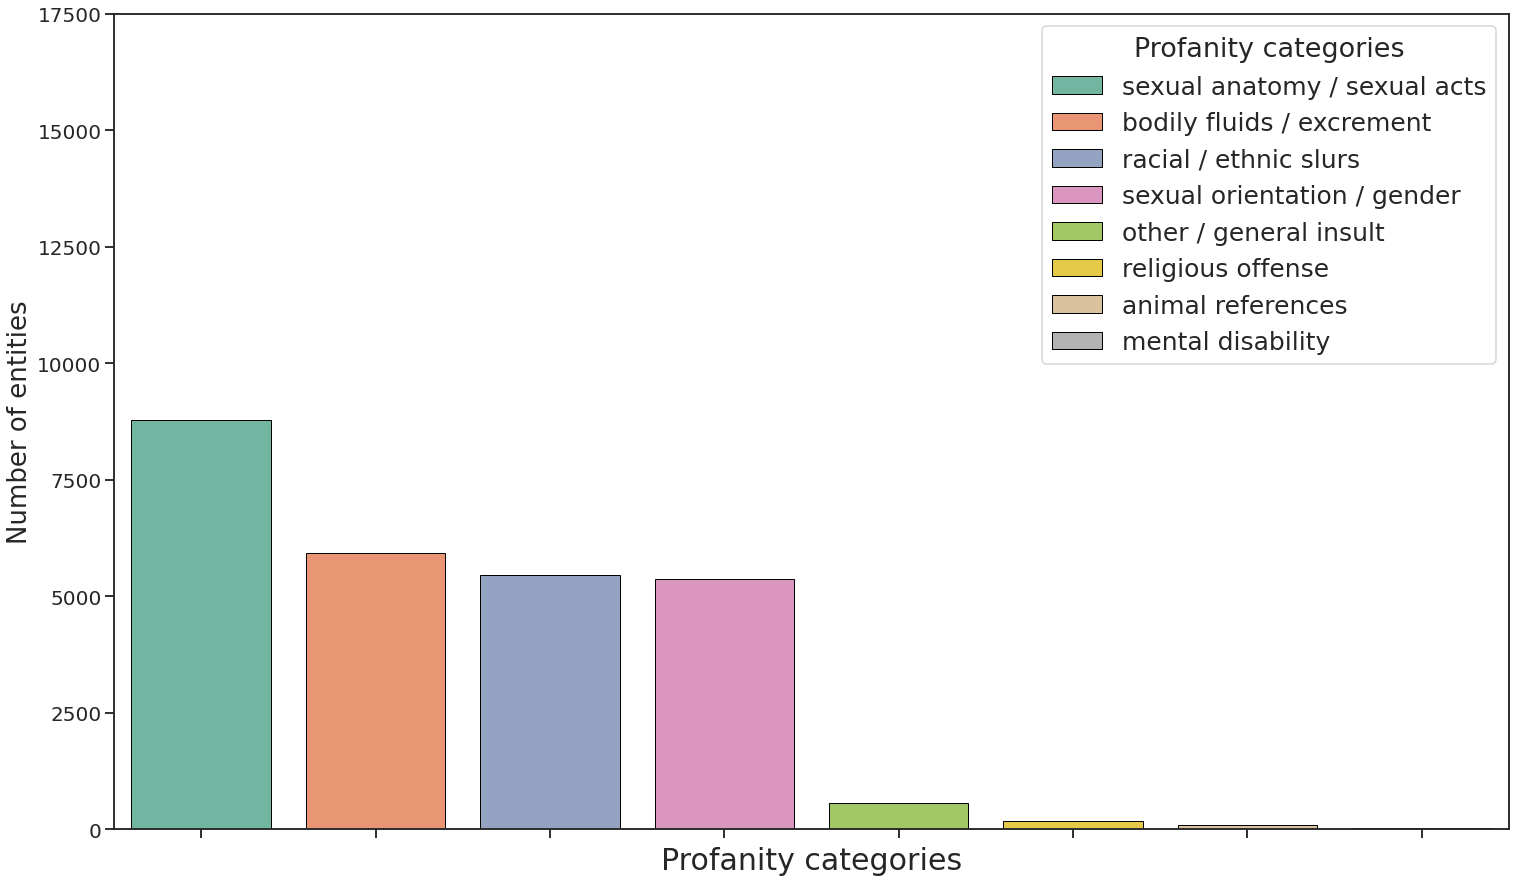

In [ ]:
plt.figure(figsize=(25,15)) 
sns.color_palette("Set2")
axe = sns.barplot(x ='category', y ='number of slurs', data = g,
            lw=1, ec="black", hue = "category", palette="Set2", dodge=False)


axe.set_ylabel('Number of entities', fontsize = 26)
axe.set_xlabel('Profanity categories', fontsize = 30)
sns.set_style("ticks")

#axe.set_xticklabels(ax.get_xticklabels(), size= 10, rotation=30, horizontalalignment='right')
#axe.set_yticklabels(axe.get_yticks(), size = 15)
axe.set(xticklabels=[])  
axe.set_yticks([0,2500, 5000, 7500, 10000, 12500, 15000, 17500])
plt.yticks(fontsize=20)
#ax.set_xtickslabels(['Label1', 'Label2', 'Label3'])
axe.legend(fontsize = 50, bbox_to_anchor=(.9, .9))
axe.legend(title='Profanity categories', fontsize='25', title_fontsize='27')



#sns.move_legend(axe, "upper right")
fig = axe.get_figure()
fig.savefig('distribbb.png')


In [ ]:
non_slurs_df.head(3)

In [ ]:
non_slurs_df["tokens"] = non_slurs_df["lyrics"].apply(lambda x: str(x).replace("|", "\n"))
non_slurs_df["tokens_p"] = non_slurs_df["tokens"].apply(lambda x: word_tokenize(x))
non_slurs_df["len_of_lyrics"] = non_slurs_df["tokens_p"].apply(lambda x: len(x))


In [ ]:
non_slurs_df.rapper.value_counts()

In [ ]:
mean_length_rapper_non_slur = non_slurs_df.groupby(["rapper"])["len_of_lyrics"].agg("mean")
average_length_lyrics_non_slur = mean_length_rapper_non_slur.to_frame().reset_index()
average_length_lyrics_non_slur.to_excel("table_aver_length_no_slurs.xlsx")
average_length_lyrics_non_slur

## Mean length for the first 15 rappers in non-slurs dataset

In [ ]:
plt.figure(figsize=(30,10)) 

sns.barplot(x='rapper', y='len_of_lyrics', data=average_length_lyrics_non_slur[:15])

In [ ]:
mean_leng_non_slurs = non_slurs_df["len_of_lyrics"].mean()
mean_leng_non_slurs